# Workshop 5: Model Management and Deployment

<h1>Sections:<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Model-Management" data-toc-modified-id="Model-Management-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Model Management</a></span></li><li><span><a href="#Model-Deployment" data-toc-modified-id="Model-Deployment-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model Deployment</a></span></li><li><span><a href="#Memmodel" data-toc-modified-id="Memmodel-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Memmodel</a></span></li></ul></div>

In [1]:
import verticapy as vp
from verticapy.utilities import *
# Connect with the database
vp.connect("tutorial_connection")
# Create VerticaPy schema for native verticapy models
#vp.create_verticapy_schema()
%load_ext verticapy.sql

Let's do some data preparation on the telco churn dataset and train a logistic regression as we did in workshop #4.

,AbccustomerIDVarchar(20),AbcgenderVarchar(20),123SeniorCitizenInt,010PartnerBoolean,010DependentsBoolean,123tenureInt,010PhoneServiceBoolean,AbcMultipleLinesVarchar(100),AbcInternetServiceVarchar(22),AbcOnlineSecurityVarchar(38),AbcOnlineBackupVarchar(38),AbcDeviceProtectionVarchar(38),AbcTechSupportVarchar(38),AbcStreamingTVVarchar(38),AbcStreamingMoviesVarchar(38),AbcContractVarchar(28),010PaperlessBillingBoolean,AbcPaymentMethodVarchar(50),"123MonthlyChargesNumeric(8,3)","123TotalChargesNumeric(9,3)",010ChurnBoolean
1,0002-ORFBO,Female,0,✅,✅,9,✅,No,DSL,No,Yes,No,Yes,Yes,No,One year,✅,Mailed check,65.6,593.3,❌
2,0003-MKNFE,Male,0,❌,❌,9,✅,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,❌,Mailed check,59.9,542.4,❌
3,0004-TLHLJ,Male,0,❌,❌,4,✅,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,✅,Electronic check,73.9,280.85,✅

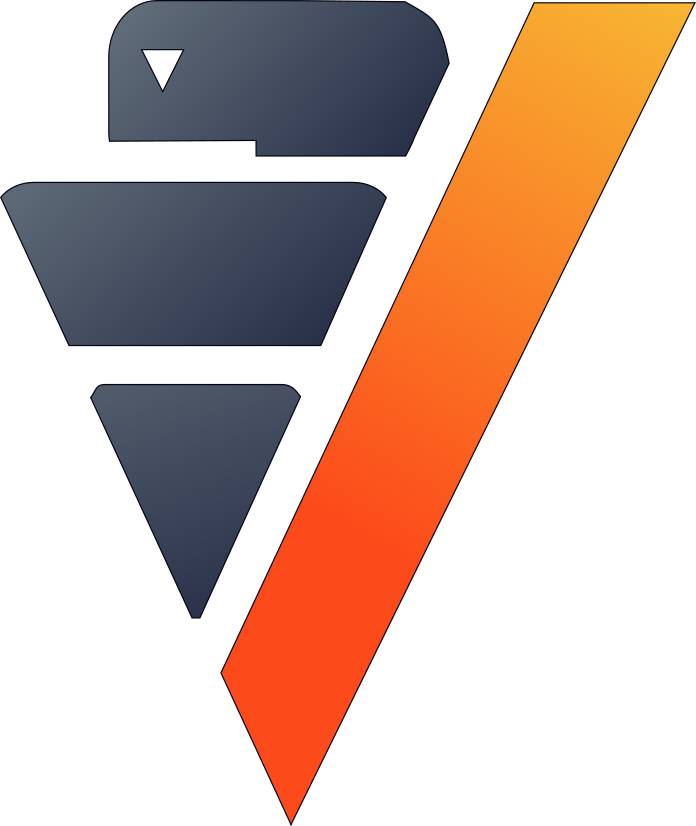

In [3]:
# Read data
churn = vp.vDataFrame("public.telco_churn")
churn.head(3)

,123SeniorCitizenInt,123PartnerInteger,123DependentsInteger,123tenureInt,123PhoneServiceInteger,123MultipleLinesInteger,123OnlineSecurityInteger,123OnlineBackupInteger,123DeviceProtectionInteger,123TechSupportInteger,123StreamingTVInteger,123StreamingMoviesInteger,123PaperlessBillingInteger,"123MonthlyChargesNumeric(8,3)","123TotalChargesNumeric(9,3)",123ChurnInteger,123gender_FemaleBool,123InternetService_DSLBool,123InternetService_Fiber_opticBool,123Contract_Month-to-monthBool,123Contract_One_yearBool,123Bool,123Bool,123PaymentMethod_Electronic_checkBool
1,0,1,1,9,1,0,0,1,0,1,1,0,1,65.6,593.3,0,1,1,0,0,1,,,0
2,0,0,0,9,1,1,0,0,0,0,0,1,0,59.9,542.4,0,0,1,0,1,0,,,0
3,0,0,0,4,1,0,0,0,1,0,0,0,1,73.9,280.85,1,0,0,1,1,0,,,1
4,1,1,0,13,1,0,0,1,1,0,1,1,1,98.0,1237.85,1,0,0,1,1,0,,,1
5,1,1,0,3,1,0,0,0,0,1,1,0,1,83.9,267.4,1,1,0,1,1,0,,,0
6,0,0,1,9,1,0,0,0,0,1,1,1,1,69.4,571.45,0,1,1,0,1,0,,,0
7,1,1,0,71,1,0,1,1,1,1,1,1,1,109.7,7904.25,0,1,0,1,0,0,,,0
8,0,1,0,63,1,1,1,0,0,1,0,0,1,84.65,5377.8,0,0,0,1,0,0,,,0
9,1,0,0,7,1,0,1,0,0,0,0,0,1,48.2,340.35,0,1,1,0,1,0,,,1
10,0,1,1,65,1,1,1,1,1,1,1,1,1,90.45,5957.9,0,1,1,0,0,0,,,0

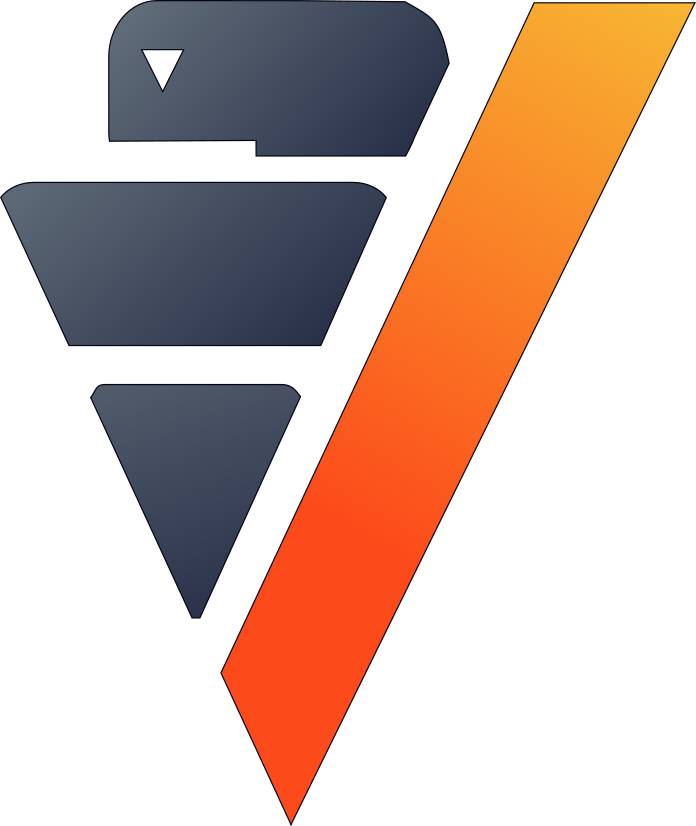

In [4]:
for column in ["DeviceProtection",
               "MultipleLines",
               "PaperlessBilling",
               "Churn",
               "TechSupport",
               "Partner",
               "StreamingTV",
               "OnlineBackup",
               "Dependents",
               "OnlineSecurity",
               "PhoneService",
               "StreamingMovies"]:
    churn[column].decode("Yes", 1, 0)
churn.one_hot_encode().drop(["customerID",
                             "gender",
                             "Contract",
                             "PaymentMethod",
                             "InternetService"])

In [5]:
# Split data to train and test data
train, test = churn.train_test_split(test_size=0.2,
                                     random_state=0)

,value
auc,0.8553151413188076
prc_auc,0.674380675802582
accuracy,0.7982954545454546
log_loss,0.175207231971105
precision,0.6677115987460815
recall,0.5447570332480819
f1_score,0.6
mcc,0.47131796036705026
informedness,0.44052891132084504
markedness,0.5042588898388272

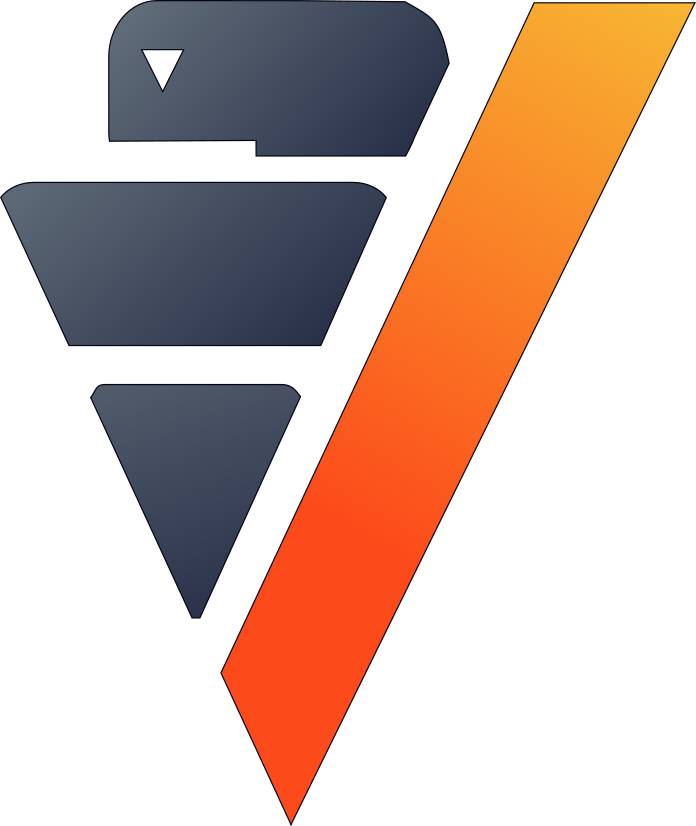

In [7]:
from verticapy.learn.linear_model import LogisticRegression
lr_model = LogisticRegression("churn_model",
                              penalty='L2',
                              tol=1e-6,
                              max_iter=1000,
                              solver="BFGS")
lr_model.fit(train,
             churn.get_columns(exclude_columns=["churn"]),
             'churn',
             test)
lr_model.classification_report()

Let's use this trained model to make predictions.

If we don't pass the cutoff parameter, it will return probabilities.

,123SeniorCitizenInt,123PartnerInteger,123DependentsInteger,123tenureInt,123PhoneServiceInteger,123MultipleLinesInteger,123OnlineSecurityInteger,123OnlineBackupInteger,123DeviceProtectionInteger,123TechSupportInteger,123StreamingTVInteger,123StreamingMoviesInteger,123PaperlessBillingInteger,"123MonthlyChargesNumeric(8,3)","123TotalChargesNumeric(9,3)",123ChurnInteger,123gender_FemaleBool,123InternetService_DSLBool,123InternetService_Fiber_opticBool,123Contract_Month-to-monthBool,123Contract_One_yearBool,123Bool,123Bool,123PaymentMethod_Electronic_checkBool,123prediction_probInteger
1,0,1,1,9,1,0,0,1,0,1,1,0,1,65.6,593.3,0,1,1,0,0,1,,,0,0
2,0,0,0,9,1,1,0,0,0,0,0,1,0,59.9,542.4,0,0,1,0,1,0,,,0,0
3,0,0,0,4,1,0,0,0,1,0,0,0,1,73.9,280.85,1,0,0,1,1,0,,,1,1
4,1,1,0,13,1,0,0,1,1,0,1,1,1,98.0,1237.85,1,0,0,1,1,0,,,1,1
5,1,1,0,3,1,0,0,0,0,1,1,0,1,83.9,267.4,1,1,0,1,1,0,,,0,1
6,0,0,1,9,1,0,0,0,0,1,1,1,1,69.4,571.45,0,1,1,0,1,0,,,0,0
7,1,1,0,71,1,0,1,1,1,1,1,1,1,109.7,7904.25,0,1,0,1,0,0,,,0,0
8,0,1,0,63,1,1,1,0,0,1,0,0,1,84.65,5377.8,0,0,0,1,0,0,,,0,0
9,1,0,0,7,1,0,1,0,0,0,0,0,1,48.2,340.35,0,1,1,0,1,0,,,1,0
10,0,1,1,65,1,1,1,1,1,1,1,1,1,90.45,5957.9,0,1,1,0,0,0,,,0,0

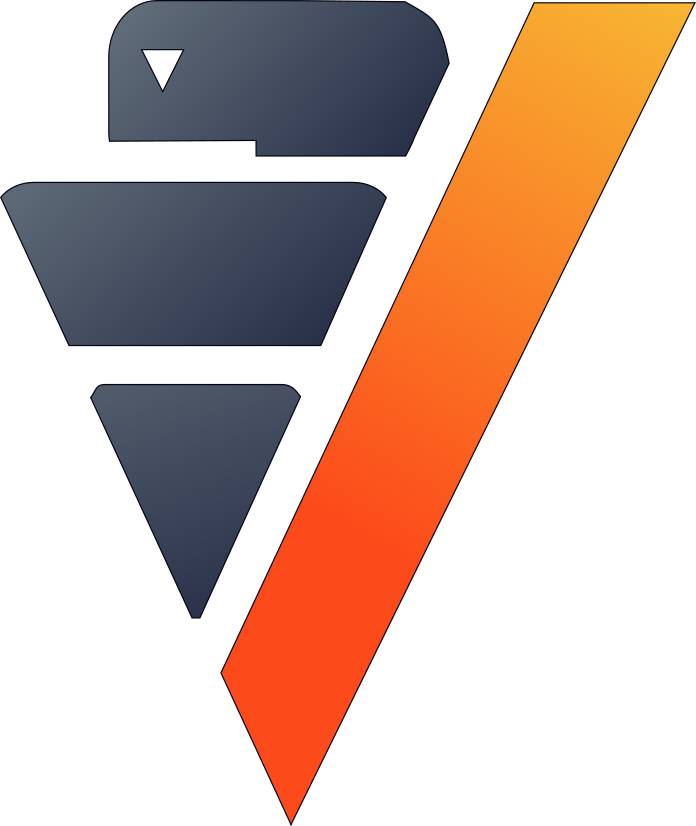

In [11]:
lr_model.predict(churn, name = "prediction_prob")

## Model Management

,123model_idInteger,Abcmodel_nameVarchar(128),123schema_idInteger,Abcschema_nameVarchar(128),123owner_idInteger,Abcowner_nameVarchar(128),AbccategoryVarchar(128),Abcmodel_typeVarchar(128),010is_completeBoolean,📅create_timeTimestamptz(35),123sizeInteger
1,45035996273898602,LR_airpassenger_2,45035996273704982,public,45035996273704962,dbadmin,VERTICA_MODELS,LINEAR_REGRESSION,✅,2022-02-11 12:35:25.979799+01:00,2153
2,45035996273908868,LR_airpassenger,45035996273704982,public,45035996273704962,dbadmin,VERTICA_MODELS,LINEAR_REGRESSION,✅,2022-02-15 10:36:44.638816+01:00,1887
3,45035996273922286,wow_churn_lg,45035996273704982,public,45035996273704962,dbadmin,VERTICA_MODELS,LOGISTIC_REGRESSION,✅,2022-03-03 16:02:44.807981+01:00,2386
4,45035996273938816,wow_churn,45035996273704982,public,45035996273704962,dbadmin,VERTICA_MODELS,RF_CLASSIFIER,✅,2022-03-09 16:30:19.463527+01:00,130189
5,45035996273942124,wow_churn_2,45035996273704982,public,45035996273704962,dbadmin,VERTICA_MODELS,RF_CLASSIFIER,✅,2022-03-09 16:53:55.202387+01:00,133289
6,45035996273969302,new_bs_kmeans,45035996273704982,public,45035996273704962,dbadmin,VERTICA_MODELS,KMEANS,✅,2022-03-18 15:34:24.812845+01:00,1863
7,45035996273984836,kmeans_bs,45035996273704982,public,45035996273704962,dbadmin,VERTICA_MODELS,KMEANS,✅,2022-03-18 18:23:17.044777+01:00,13215
8,45035996273993890,shanghai_automl,45035996273704982,public,45035996273704962,dbadmin,VERTICA_MODELS,RF_REGRESSOR,✅,2022-03-18 18:24:40.915095+01:00,25337
9,45035996274001750,cvm_rf2,45035996273704982,public,45035996273704962,dbadmin,VERTICA_MODELS,RF_CLASSIFIER,✅,2022-03-21 22:35:37.106860+01:00,192668
10,45035996274003420,cvm_rf3,45035996273704982,public,45035996273704962,dbadmin,VERTICA_MODELS,RF_CLASSIFIER,✅,2022-03-21 22:36:53.521260+01:00,137776

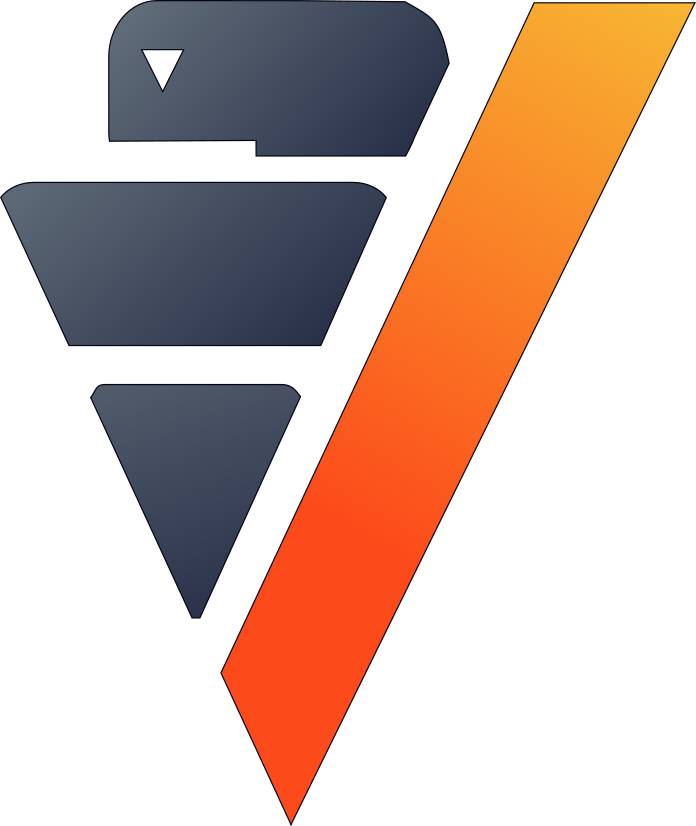

In [8]:
%%sql
SELECT * FROM models LIMIT 10000;

,123model_idInteger,Abcmodel_nameVarchar(128),123schema_idInteger,Abcschema_nameVarchar(128),123owner_idInteger,Abcowner_nameVarchar(128),AbccategoryVarchar(128),Abcmodel_typeVarchar(128),010is_completeBoolean,📅create_timeTimestamptz(35),123sizeInteger
1,45035996274355756,churn_model,45035996273704982,public,45035996273704962,dbadmin,VERTICA_MODELS,LOGISTIC_REGRESSION,✅,2023-01-12 11:55:46.564654+01:00,6139

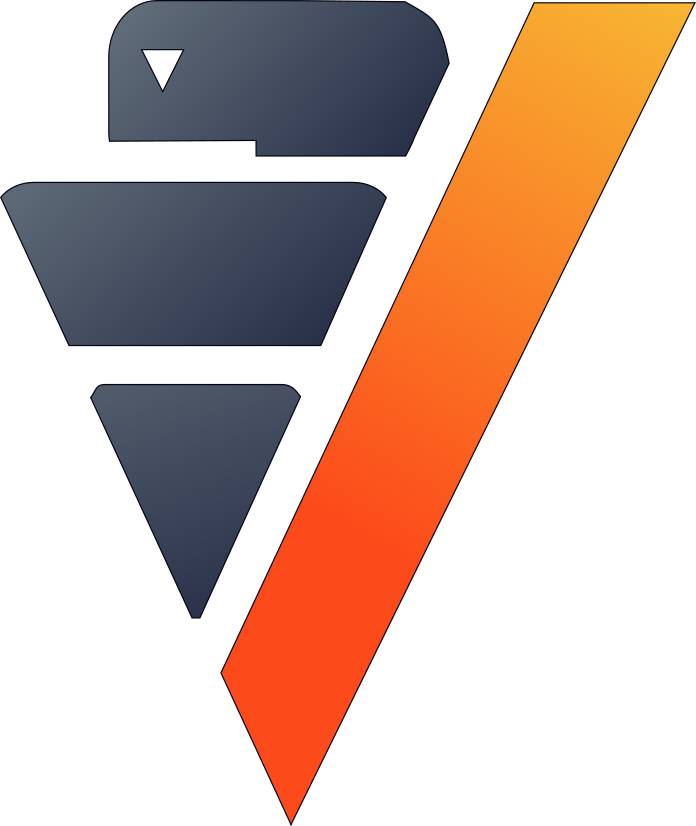

In [9]:
%%sql
SELECT * FROM models WHERE model_name='churn_model';

We can use both python or sql to access model parameters.

,Abcattr_nameVarchar(128),AbcLong varchar(32000000),123#_of_rowsInteger
1,details,,24
2,regularization,,1
3,iteration_count,,1
4,rejected_row_count,,1
5,accepted_row_count,,1
6,call_string,,1

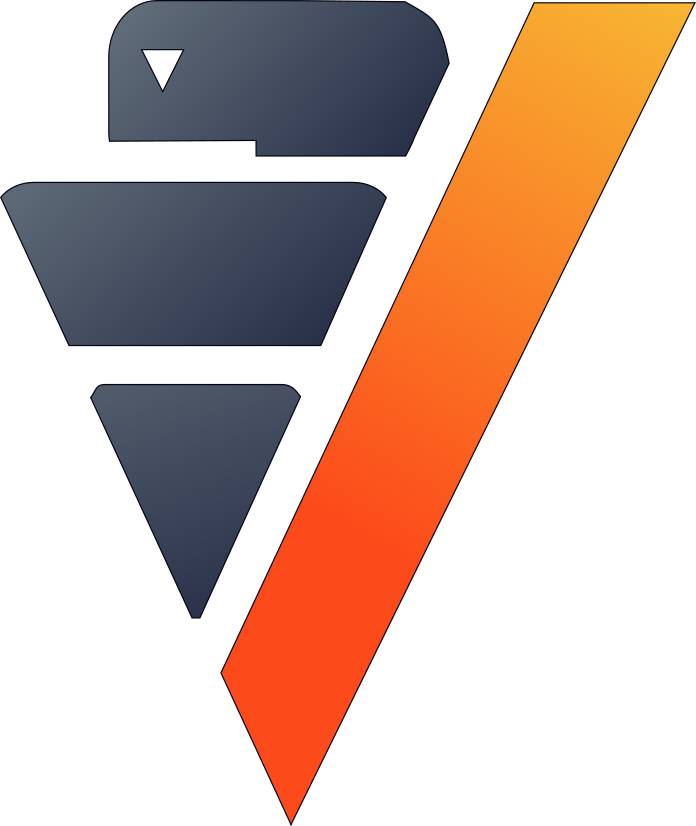

In [12]:
%%sql
SELECT GET_MODEL_ATTRIBUTE(USING PARAMETERS model_name= 'churn_model');

,Abcattr_nameVarchar(128),AbcLong varchar(32000000),123#_of_rowsInteger
1,details,,24
2,regularization,,1
3,iteration_count,,1
4,rejected_row_count,,1
5,accepted_row_count,,1
6,call_string,,1

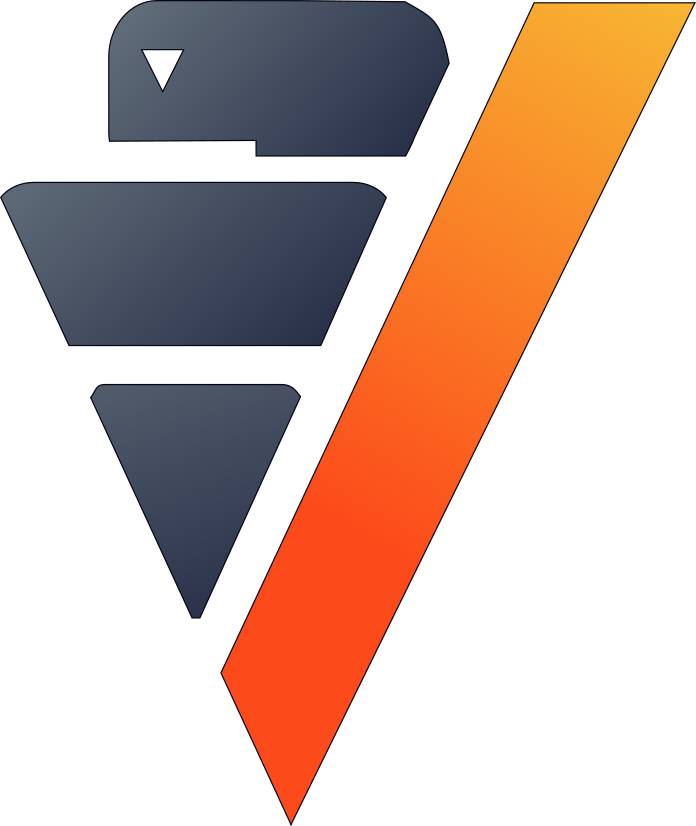

In [14]:
lr_model.get_attr()

,AbcVarchar(65000),123coefficientFloat(22),123std_errFloat(22),123z_valueFloat(22),123p_valueFloat(22)
1,,-2.03295587387004,0.306166206866367,-6.64004004451531,3.13597942568126e-11
2,,0.289007644416623,0.125639858593243,2.30028629172753,0.0214320057893252
3,,0.0431681082756675,0.097358066620874,0.443395290949749,0.657479841412696
4,,-0.152946339773696,0.13239876310288,-1.15519462711936,0.248010734462025
5,,-0.0579902991175259,0.00821111926488262,-7.06241101204549,1.63638110882785e-12
6,,-0.713821513263866,0.349006985876765,-2.04529290859501,0.0408259894257703
7,,0.162540097388862,0.151243153679537,1.07469391793602,0.282511787661151
8,,-0.479102475088907,0.164736869845209,-2.90828929515952,0.00363411980404816
9,,-0.235267541940726,0.145785323322287,-1.61379442442653,0.106572024342639
10,,-0.0466362578325875,0.135773339705182,-0.343486121309629,0.731232780043225

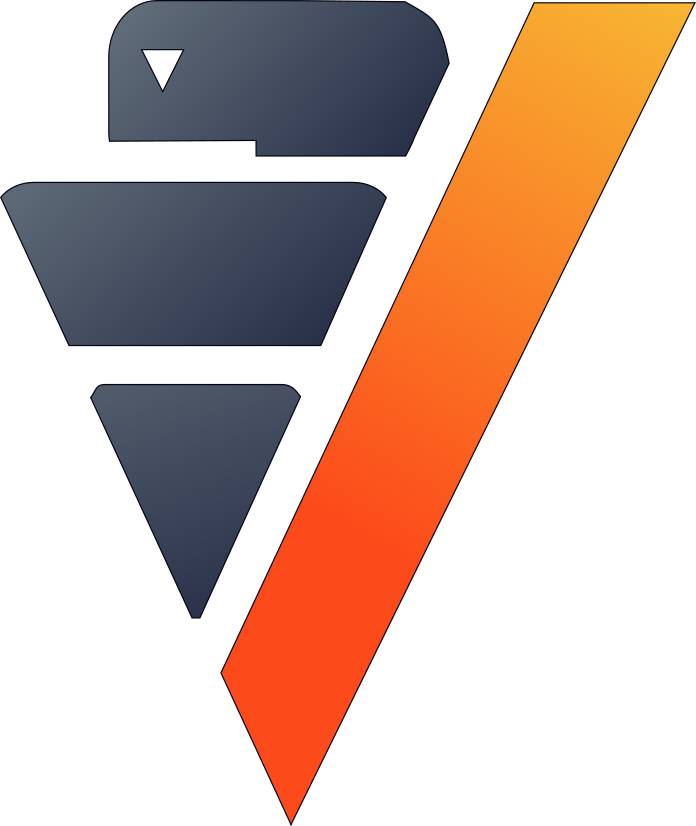

In [15]:
lr_model.get_attr("details")

deploySQL() returns the vSQL query to predict using the model.

In [16]:
display(lr_model.deploySQL())

'PREDICT_LOGISTIC_REG("SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "MonthlyCharges", "TotalCharges", "gender_Female", "InternetService_DSL", "InternetService_Fiber_optic", "Contract_Month-to-month", "Contract_One_year", "PaymentMethod_Bank_transfer_(automatic)", "PaymentMethod_Credit_card_(automatic)", "PaymentMethod_Electronic_check" USING PARAMETERS model_name = \'churn_model\', type = \'probability\', match_by_pos = \'true\')'

## Model Deployment

For deployment, we have many options:

    - Use jupyter notebooks (or .py scripts) and VerticaPy (one for data preparation and one for prediction)
    
    - Use the sql query generated by verticaPy to create a View, or multiple stored procedures.

In [24]:
print(churn.current_relation())

(
   SELECT
     "SeniorCitizen",
     "Partner",
     "Dependents",
     "tenure",
     "PhoneService",
     "MultipleLines",
     "OnlineSecurity",
     "OnlineBackup",
     "DeviceProtection",
     "TechSupport",
     "StreamingTV",
     "StreamingMovies",
     "PaperlessBilling",
     "MonthlyCharges",
     "TotalCharges",
     "Churn",
     "gender_Female",
     "InternetService_DSL",
     "InternetService_Fiber_optic",
     "Contract_Month-to-month",
     "Contract_One_year",
     "PaymentMethod_Bank_transfer_(automatic)",
     "PaymentMethod_Credit_card_(automatic)",
     "PaymentMethod_Electronic_check",
     (CASE WHEN PREDICT_LOGISTIC_REG("SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "MonthlyCharges", "TotalCharges", "gender_Female", "InternetService_DSL", "InternetService_Fiber_optic", "Contract_Month-to-month", "Co

The to_db method is the fastest way to save the vDataFrame as a view, but of course we could also manually optimize the query and split it in two different stored procedures (data preparation and prediction).

,123SeniorCitizenInt,123PartnerInteger,123DependentsInteger,123tenureInt,123PhoneServiceInteger,123MultipleLinesInteger,123OnlineSecurityInteger,123OnlineBackupInteger,123DeviceProtectionInteger,123TechSupportInteger,123StreamingTVInteger,123StreamingMoviesInteger,123PaperlessBillingInteger,"123MonthlyChargesNumeric(8,3)","123TotalChargesNumeric(9,3)",123ChurnInteger,123gender_FemaleBool,123InternetService_DSLBool,123InternetService_Fiber_opticBool,123Contract_Month-to-monthBool,123Contract_One_yearBool,123Bool,123Bool,123PaymentMethod_Electronic_checkBool,123prediction_probInteger
1,0,1,1,9,1,0,0,1,0,1,1,0,1,65.6,593.3,0,1,1,0,0,1,,,0,0
2,0,0,0,9,1,1,0,0,0,0,0,1,0,59.9,542.4,0,0,1,0,1,0,,,0,0
3,0,0,0,4,1,0,0,0,1,0,0,0,1,73.9,280.85,1,0,0,1,1,0,,,1,1
4,1,1,0,13,1,0,0,1,1,0,1,1,1,98.0,1237.85,1,0,0,1,1,0,,,1,1
5,1,1,0,3,1,0,0,0,0,1,1,0,1,83.9,267.4,1,1,0,1,1,0,,,0,1
6,0,0,1,9,1,0,0,0,0,1,1,1,1,69.4,571.45,0,1,1,0,1,0,,,0,0
7,1,1,0,71,1,0,1,1,1,1,1,1,1,109.7,7904.25,0,1,0,1,0,0,,,0,0
8,0,1,0,63,1,1,1,0,0,1,0,0,1,84.65,5377.8,0,0,0,1,0,0,,,0,0
9,1,0,0,7,1,0,1,0,0,0,0,0,1,48.2,340.35,0,1,1,0,1,0,,,1,0
10,0,1,1,65,1,1,1,1,1,1,1,1,1,90.45,5957.9,0,1,1,0,0,0,,,0,0

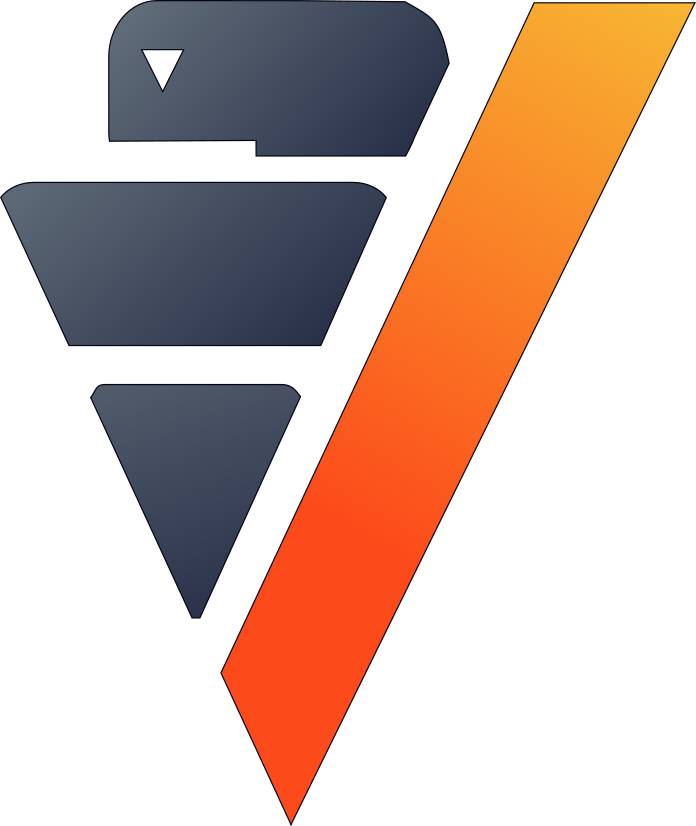

In [25]:
churn.to_db("public.churn_results",
              relation_type = "view")

## Memmodel

The memmodel object allows to deploy the model outside of Vertica, in any Python environment (VerticaPy needs to be installed).

In [17]:
mmodel = lr_model.to_memmodel()

In [18]:
mmodel

<LogisticRegression>

coefficients = [ 2.89007644e-01  4.31681083e-02 -1.52946340e-01 -5.79902991e-02
 -7.13821513e-01  1.62540097e-01 -4.79102475e-01 -2.35267542e-01
 -4.66362578e-02 -4.83456376e-01  4.52633752e-02  5.51510261e-02
  3.78615138e-01  1.11439582e-02  3.00005555e-04  1.38514375e-02
  4.70904960e-01  8.71121993e-01  1.18311403e+00  5.36327589e-01
  4.44122088e-02  3.90391148e-02  4.14485682e-01]

intercept = -2.03295587387004

It's possible to do prediction both using SQL or in memory (in any python environment, similarly to Python Pickle).

Is possible to predict both the response and the probabilities.

In [19]:
mmodel.predict_sql(["SeniorCitizen",
                    "Partner",
                    "Dependents",
                    "tenure",
                    "PhoneService",
                    "MultipleLines",
                    "OnlineSecurity",
                    "OnlineBackup",
                    "DeviceProtection",
                    "TechSupport",
                    "StreamingTV",
                    "StreamingMovies",
                    "PaperlessBilling",
                    "MonthlyCharges",
                    "TotalCharges",
                    "gender_Female",
                    "InternetService_DSL",
                    "InternetService_Fiber_optic",
                    "Contract_Month-to-month",
                    "Contract_One_year",
                    "PaymentMethod_Bank_transfer_(automatic)",
                    "PaymentMethod_Credit_card_(automatic)",
                    "PaymentMethod_Electronic_check"])

'((1 / (1 + EXP(- (-2.03295587387004 + 0.289007644416623 * SeniorCitizen + 0.0431681082756675 * Partner + -0.152946339773696 * Dependents + -0.0579902991175259 * tenure + -0.713821513263866 * PhoneService + 0.162540097388862 * MultipleLines + -0.479102475088907 * OnlineSecurity + -0.235267541940726 * OnlineBackup + -0.0466362578325875 * DeviceProtection + -0.483456376340994 * TechSupport + 0.0452633752058054 * StreamingTV + 0.0551510260715473 * StreamingMovies + 0.378615137614611 * PaperlessBilling + 0.0111439582222271 * MonthlyCharges + 0.000300005555471314 * TotalCharges + 0.0138514375220583 * gender_Female + 0.470904960430333 * InternetService_DSL + 0.871121993378583 * InternetService_Fiber_optic + 1.18311402995348 * Contract_Month-to-month + 0.536327588746456 * Contract_One_year + 0.0444122088387034 * PaymentMethod_Bank_transfer_(automatic) + 0.039039114846532 * PaymentMethod_Credit_card_(automatic) + 0.414485682468883 * PaymentMethod_Electronic_check)))) > 0.5)::int'

In [20]:
mmodel.predict_proba_sql(["SeniorCitizen",
                    "Partner",
                    "Dependents",
                    "tenure",
                    "PhoneService",
                    "MultipleLines",
                    "OnlineSecurity",
                    "OnlineBackup",
                    "DeviceProtection",
                    "TechSupport",
                    "StreamingTV",
                    "StreamingMovies",
                    "PaperlessBilling",
                    "MonthlyCharges",
                    "TotalCharges",
                    "gender_Female",
                    "InternetService_DSL",
                    "InternetService_Fiber_optic",
                    "Contract_Month-to-month",
                    "Contract_One_year",
                    "PaymentMethod_Bank_transfer_(automatic)",
                    "PaymentMethod_Credit_card_(automatic)",
                    "PaymentMethod_Electronic_check"])

['1 - (1 / (1 + EXP(- (-2.03295587387004 + 0.289007644416623 * SeniorCitizen + 0.0431681082756675 * Partner + -0.152946339773696 * Dependents + -0.0579902991175259 * tenure + -0.713821513263866 * PhoneService + 0.162540097388862 * MultipleLines + -0.479102475088907 * OnlineSecurity + -0.235267541940726 * OnlineBackup + -0.0466362578325875 * DeviceProtection + -0.483456376340994 * TechSupport + 0.0452633752058054 * StreamingTV + 0.0551510260715473 * StreamingMovies + 0.378615137614611 * PaperlessBilling + 0.0111439582222271 * MonthlyCharges + 0.000300005555471314 * TotalCharges + 0.0138514375220583 * gender_Female + 0.470904960430333 * InternetService_DSL + 0.871121993378583 * InternetService_Fiber_optic + 1.18311402995348 * Contract_Month-to-month + 0.536327588746456 * Contract_One_year + 0.0444122088387034 * PaymentMethod_Bank_transfer_(automatic) + 0.039039114846532 * PaymentMethod_Credit_card_(automatic) + 0.414485682468883 * PaymentMethod_Electronic_check))))',
 '1 / (1 + EXP(- (-2

In [23]:
mmodel.predict([[0,1,1,9,1,0,0,1,0,1,1,0,1,65.6,593.3,1,1,0,0,1,0,0,0]])

array([0])